In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Principal Component Analysis Assignment

In [2]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

### Import the [PitchFX data set](https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv).

In [3]:
df = pd.read_csv("data/baseball_pitchfx.csv")

<IPython.core.display.Javascript object>

In [4]:
df.head()

,gameString,gameDate,visitor,home,inning,side,balls,strikes,outs,batterId,...,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallType,battedBallAngle,battedBallDistance,paResult
0,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,0,0,452655,...,2044.22,205.477,-0.374,2.933,-6.93,8.28,NaN,NaN,NaN,NaN
1,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,1,0,452655,...,1966.32,220.143,0.342,3.223,-7.48,7.35,NaN,NaN,NaN,NaN
2,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,2,0,452655,...,2127.17,198.816,0.389,2.266,-5.22,9.79,FB,27.78,323.03,IP_OUT
3,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,0,1,605412,...,1947.11,198.734,-0.004,2.380,-7.24,8.40,NaN,NaN,NaN,NaN
4,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,1,1,605412,...,1903.08,205.503,0.272,2.421,-6.79,9.37,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

### Keep only the pitch type and the numeric columns (exluding ID fields).

* Drop any remaining records that contain null values.
* Consider `pitchType` as `y`/target and the remaining columns to be `X`/features.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79931 entries, 0 to 79930
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gameString          79931 non-null  object 
 1   gameDate            79931 non-null  object 
 2   visitor             79931 non-null  object 
 3   home                79931 non-null  object 
 4   inning              79931 non-null  int64  
 5   side                79931 non-null  object 
 6   balls               79931 non-null  int64  
 7   strikes             79931 non-null  int64  
 8   outs                79931 non-null  int64  
 9   batterId            79931 non-null  int64  
 10  batterName          79931 non-null  object 
 11  batterHand          79931 non-null  object 
 12  batterPosition      79931 non-null  object 
 13  pitcherId           79931 non-null  int64  
 14  pitcherName         79931 non-null  object 
 15  pitcherHand         79931 non-null  object 
 16  time

<IPython.core.display.Javascript object>

In [6]:
df["battedBallAngle"]

0          NaN
1          NaN
2        27.78
3          NaN
4          NaN
         ...  
79926      NaN
79927      NaN
79928      NaN
79929      NaN
79930    24.95
Name: battedBallAngle, Length: 79931, dtype: float64

<IPython.core.display.Javascript object>

In [7]:
drop_cols = [
    "gameString",
    "gameDate",
    "visitor",
    "home",
    "side",
    "batterId",
    "batterName",
    "batterHand",
    "batterPosition",
    "pitcherId",
    "pitcherName",
    "pitcherHand",
    "catcherId",
    "catcher",
    "umpireId",
    "umpire",
    "pitchResult",
    "battedBallType",
    "battedBallAngle",
    "battedBallDistance",
    "paResult",
    "side",
]
df = df.drop(drop_cols, 1)
df = df.dropna()


<IPython.core.display.Javascript object>

In [25]:
pitches = df["pitchType"].value_counts()
keep_pitches = pitches > 1000
keeps = keep_pitches.index[keep_pitches.values]
df = df[df["pitchType"].isin(keeps)]

<IPython.core.display.Javascript object>

In [26]:
df["pitchType"].value_counts()

FF    28615
FT    10277
SL     8709
CH     8309
CU     6027
SI     5252
FC     3741
KC     1624
Name: pitchType, dtype: int64

<IPython.core.display.Javascript object>

In [27]:
X = df.drop("pitchType", 1)
y = df["pitchType"]

<IPython.core.display.Javascript object>

In [28]:
X.isna().sum()

inning              0
balls               0
strikes             0
outs                0
timesFaced          0
probCalledStrike    0
releaseVelocity     0
spinRate            0
spinDir             0
locationHoriz       0
locationVert        0
movementHoriz       0
movementVert        0
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
X.head()

,inning,balls,strikes,outs,timesFaced,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert
0,1,0,0,0,1,0.975,94.2,2044.22,205.477,-0.374,2.933,-6.93,8.28
1,1,0,1,0,1,0.745,97.1,1966.32,220.143,0.342,3.223,-7.48,7.35
2,1,0,2,0,1,0.968,96.5,2127.17,198.816,0.389,2.266,-5.22,9.79
3,1,0,0,1,1,1.000,95.6,1947.11,198.734,-0.004,2.380,-7.24,8.40
4,1,0,1,1,1,1.000,95.6,1903.08,205.503,0.272,2.421,-6.79,9.37


<IPython.core.display.Javascript object>

In [29]:
y.value_counts()

FF    28615
FT    10277
SL     8709
CH     8309
CU     6027
SI     5252
FC     3741
KC     1624
Name: pitchType, dtype: int64

<IPython.core.display.Javascript object>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

<IPython.core.display.Javascript object>

### Reduce the dimensionality of the data using PCA to two components.

Don't forget to scale.

In [47]:
scaler = StandardScaler()
scaler.fit(X_train)

std_X_train = scaler.transform(X_train)
std_X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [36]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(std_X_train)

<IPython.core.display.Javascript object>

In [43]:
pcs[:, 0]

array([ 3.91708312,  0.7930811 , -0.52039556, ..., -1.20187401,
       -0.08161474, -0.49962871])

<IPython.core.display.Javascript object>

### Compute the explained variance for new data set.

In [38]:
pca.explained_variance_ratio_.sum()

0.29911147840719565

<IPython.core.display.Javascript object>

### Generate a scatter plot that visualizes how the component values are distributed.

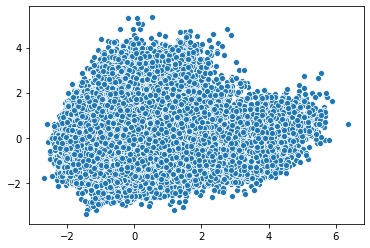

<IPython.core.display.Javascript object>

In [44]:
sns.scatterplot(pcs[:, 0], pcs[:, 1])

### Create a line plot that shows the explained variance by number of components.

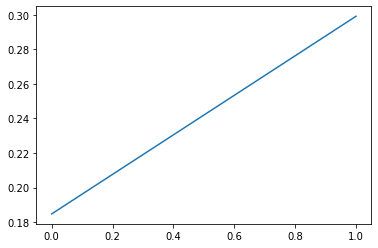

<IPython.core.display.Javascript object>

In [46]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumsum)

### Iteratively train and score a Random Forest Classifier (to predict `pitchType`).

* In each iteration:
    * Increase the number of principal components (start with `2`)
    * Store the number of components and model score

In [53]:
pca = PCA(n_components=2)
pd.DataFrame(pca.fit_transform(std_X_train))

,0,1
0,3.916826,0.444874
1,0.793100,-1.538132
2,-0.520334,2.348563
3,-1.295492,0.763776
4,-0.554841,-0.484039
...,...,...
55288,0.833799,-0.178285
55289,-0.192765,2.310951
55290,-1.201815,-1.326649
55291,-0.081572,0.470380


<IPython.core.display.Javascript object>

In [57]:
pca = PCA(n_components=13)
pd.DataFrame(pca.fit_transform(std_X_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.916817,0.444781,0.081009,0.161501,0.074900,0.086766,-0.117143,-0.162845,-0.031941,-0.127106,0.255286,-1.467962,0.311708
1,0.793122,-1.537897,-1.041447,-0.599054,-1.745886,-0.927243,-0.730054,0.770784,0.237537,0.397489,0.321990,0.155433,-0.397249
2,-0.520339,2.348513,2.117172,0.381462,-0.116668,-0.641306,-0.094540,0.082258,-0.239743,-0.830477,0.471860,0.355129,0.027562
3,-1.295520,0.763473,-1.519323,-0.250344,-0.045254,1.301265,0.155395,0.850548,-0.943800,-1.107974,0.181548,-0.331077,0.513515
4,-0.554858,-0.484221,2.447152,0.584484,-0.608503,1.667150,-1.123287,-0.861368,0.301977,0.600837,0.421415,0.244421,0.263496
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55288,0.833816,-0.178099,0.397113,-0.660202,1.938463,-1.006781,-0.567833,-0.067372,-0.837318,-0.474597,-0.175058,-0.048841,-0.291538
55289,-0.192714,2.311500,-0.639063,1.860616,0.399463,1.102740,-1.725779,-0.280978,-0.321497,0.122349,-0.373194,-0.508230,-0.810065
55290,-1.201850,-1.327026,0.060495,1.197607,1.268527,-0.398952,-1.126361,-0.233636,-1.167053,-0.706369,0.914904,0.303043,0.543822
55291,-0.081587,0.470222,1.964795,-0.686658,2.153193,-0.565171,-0.273773,0.423922,-0.789378,-0.789869,-0.199276,0.210090,0.233140


<IPython.core.display.Javascript object>

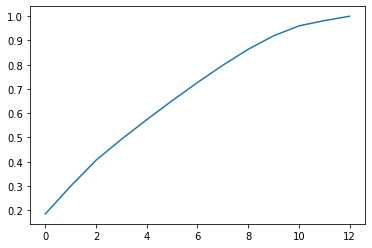

<IPython.core.display.Javascript object>

In [58]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumsum)

In [59]:
model = RandomForestClassifier(max_depth=4, random_state=1, n_jobs=-1)

<IPython.core.display.Javascript object>

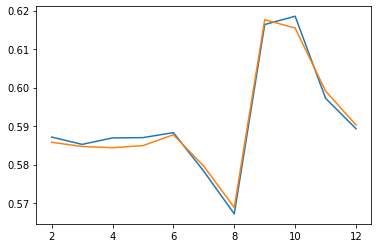

<IPython.core.display.Javascript object>

In [61]:
train_scores = []
test_scores = []

for n in range(2, 13):
    pca = PCA(n_components=n)
    pcs = pca.fit_transform(std_X_train)
    pcs_test = pca.transform(std_X_test)
    model.fit(pcs, y_train)
    train_score = model.score(pcs, y_train)
    train_scores.append(train_score)
    test_score = model.score(pcs_test, y_test)
    test_scores.append(test_score)

plt.plot(range(2, 13), train_scores)
plt.plot(range(2, 13), test_scores)
plt.show()

### Create a line plot that shows the training scores across the different numbers of principal components.

### Based on the analysis you conducted, what is the optimal number of principal components?